Import Libraries

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pickle

Load Dataset 

In [5]:
# Set the path to your dataset
dataset_path = 'Resized_Indian'

Converting Images to Arrays

In [7]:
# Initialize lists to hold images and labels
images = []
labels = []

In [9]:
# Loop through each subdirectory in the dataset
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            # Load the image
            image = cv2.imread(image_path)
            # Resize the image to a fixed size (e.g., 64x64)
            image = cv2.resize(image, (64, 64))
            images.append(image)
            labels.append(label)

In [11]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

Shape Of The Image

In [13]:
print("Images shape:", len(images))
print("Labels shape:", len(labels))
assert len(images) == len(labels), "Mismatch between images and labels!"


Images shape: 42745
Labels shape: 42745


Balancing The Dataset

In [15]:
import numpy as np
from collections import Counter

# Count the number of samples per class
class_counts = Counter(labels)
min_samples = min(class_counts.values())

# Initialize lists for balanced dataset
balanced_images = []
balanced_labels = []

# Downsample each class
for class_label in np.unique(labels):
    # Get indices of all images for this class
    class_indices = np.where(labels == class_label)[0]
    
    # Debugging: Print the number of samples per class
    print(f"Class {class_label} has {len(class_indices)} samples.")

    # Skip classes that have no samples
    if len(class_indices) == 0:
        print(f"No samples found for class {class_label}. Skipping...")
        continue

    # If the class has fewer samples than the min_samples, select all available samples
    if len(class_indices) < min_samples:
        print(f"Class {class_label} has fewer samples than the minimum. Using all available samples.")
        selected_indices = class_indices
    else:
        # Randomly select min_samples images for this class
        selected_indices = np.random.choice(class_indices, min_samples, replace=False)
    
    # Debugging: Check how many indices are selected
    print(f"Class {class_label}: Selected {len(selected_indices)} samples.")

    # Append the selected images and labels to the balanced dataset
    balanced_images.extend(images[selected_indices])
    balanced_labels.extend(labels[selected_indices])

# Convert lists to numpy arrays
balanced_images = np.array(balanced_images)
balanced_labels = np.array(balanced_labels)

# Now you can access .shape without error
print("Balanced dataset shape:", balanced_images.shape, balanced_labels.shape)


Class 1 has 1200 samples.
Class 1: Selected 1200 samples.
Class 2 has 1200 samples.
Class 2: Selected 1200 samples.
Class 3 has 1200 samples.
Class 3: Selected 1200 samples.
Class 4 has 1200 samples.
Class 4: Selected 1200 samples.
Class 5 has 1200 samples.
Class 5: Selected 1200 samples.
Class 6 has 1200 samples.
Class 6: Selected 1200 samples.
Class 7 has 1200 samples.
Class 7: Selected 1200 samples.
Class 8 has 1200 samples.
Class 8: Selected 1200 samples.
Class 9 has 1200 samples.
Class 9: Selected 1200 samples.
Class A has 1200 samples.
Class A: Selected 1200 samples.
Class B has 1200 samples.
Class B: Selected 1200 samples.
Class C has 1447 samples.
Class C: Selected 1200 samples.
Class D has 1200 samples.
Class D: Selected 1200 samples.
Class E has 1200 samples.
Class E: Selected 1200 samples.
Class F has 1200 samples.
Class F: Selected 1200 samples.
Class G has 1200 samples.
Class G: Selected 1200 samples.
Class H has 1200 samples.
Class H: Selected 1200 samples.
Class I has 13

In [17]:
print("Class counts before balancing:", Counter(labels))
print("Class counts after balancing:", Counter(balanced_labels))


Class counts before balancing: Counter({'C': 1447, 'O': 1429, 'I': 1379, 'V': 1290, '1': 1200, '2': 1200, '3': 1200, '4': 1200, '5': 1200, '6': 1200, '7': 1200, '8': 1200, '9': 1200, 'A': 1200, 'B': 1200, 'D': 1200, 'E': 1200, 'F': 1200, 'G': 1200, 'H': 1200, 'J': 1200, 'K': 1200, 'L': 1200, 'M': 1200, 'N': 1200, 'P': 1200, 'Q': 1200, 'R': 1200, 'S': 1200, 'T': 1200, 'U': 1200, 'W': 1200, 'X': 1200, 'Y': 1200, 'Z': 1200})
Class counts after balancing: Counter({'1': 1200, '2': 1200, '3': 1200, '4': 1200, '5': 1200, '6': 1200, '7': 1200, '8': 1200, '9': 1200, 'A': 1200, 'B': 1200, 'C': 1200, 'D': 1200, 'E': 1200, 'F': 1200, 'G': 1200, 'H': 1200, 'I': 1200, 'J': 1200, 'K': 1200, 'L': 1200, 'M': 1200, 'N': 1200, 'O': 1200, 'P': 1200, 'Q': 1200, 'R': 1200, 'S': 1200, 'T': 1200, 'U': 1200, 'V': 1200, 'W': 1200, 'X': 1200, 'Y': 1200, 'Z': 1200})


In [ ]:
'''from collections import Counter

# Count images per class
class_counts = {}
for category in categories:
    class_counts[category] = len(os.listdir(os.path.join(data_dir, category)))
color = 'pink'
# Plot class distribution
plt.bar(class_counts.keys(), class_counts.values(),color=color)
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()'''

Encoding Labels 

In [19]:
# Encode labels to integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [21]:
# One-hot encode the labels
num_classes = 35
labels = to_categorical(labels, num_classes)


Normalization

In [23]:
# Normalize the images
images = images.astype('float32') / 255.0

Splitting the Dataset

In [24]:
# Split the dataset into training and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

Image Augumentation

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


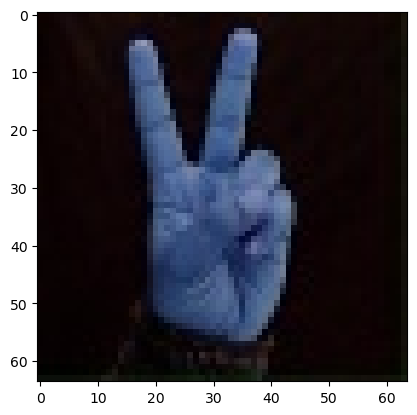

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)
plt.imshow(x_test[0])
print(y_test[0])

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import regularizers


Build The Model

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3),kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


C:\Users\suman\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Training And Validation

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
936/936 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8258 - loss: 1.3724 - val_accuracy: 0.9953 - val_loss: 0.3361
Epoch 2/50
936/936 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9775 - loss: 0.3852 - val_accuracy: 0.9986 - val_loss: 0.2394
Epoch 3/50
936/936 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9867 - loss: 0.2853 - val_accuracy: 0.9973 - val_loss: 0.2183
Epoch 4/50
936/936 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9879 - loss: 0.2561 - val_accuracy: 0.9978 - val_loss: 0.1923
Epoch 5/50
936/936 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9881 - loss: 0.2334 - val_accuracy: 0.9969 - val_loss: 0.1982
Epoch 6/50
936/936 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9889 - loss: 0.2307 - val_accuracy: 0.9991 - val_loss: 0.1760
Epoch 7/50
936/936 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9909 - loss: 0.2108 - val_accuracy: 0.9977 - val_loss: 0.1758
Epoch 8/50
936/936 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9903 - loss: 0.2073 - 

Saving the model

In [50]:
model.save("sign_language_model.h5")
print("MOdel trained and saves!")

MOdel trained and saves!


In [52]:
with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)

print("Training history saved!")

Training history saved!


Visualization

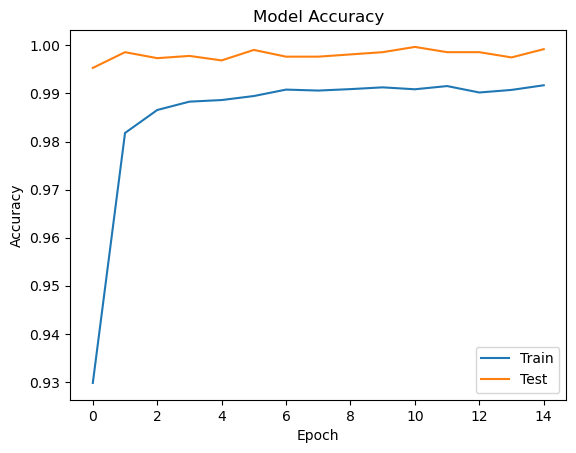

In [54]:
plt.plot(history .history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

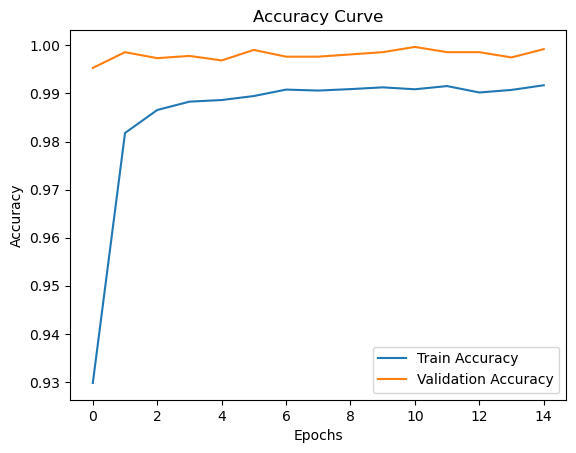

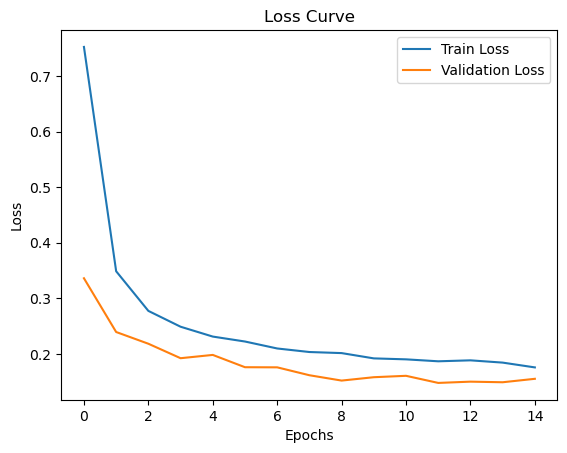

In [59]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()